In [1]:
# @title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title Install necessary libraries
!pip install pandas scikit-learn matplotlib

In [19]:
# @title Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# @title Load the Dataset
url = "/content/drive/MyDrive/Ml dataset/IDP Datasets/archive/water_potability.csv"
df = pd.read_csv(url)

In [6]:
# @title Drop rows with missing values
df = df.dropna()

In [8]:
# @title Define features (X) and target (y)
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']

In [9]:
# @title Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# @title  Implement Decision Tree Classifier with techniques to prevent overfitting
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

In [11]:
# @title Implement Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

In [12]:
# @title Display results for Decision Tree
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy * 100:.2f}%")
print(classification_report(y_test, dt_y_pred))

Decision Tree Classifier:
Accuracy: 63.52%
              precision    recall  f1-score   support

           0       0.62      0.91      0.74       231
           1       0.69      0.26      0.38       172

    accuracy                           0.64       403
   macro avg       0.66      0.59      0.56       403
weighted avg       0.65      0.64      0.59       403



In [13]:
# @title Display results for Random Forest
print("\nRandom Forest Classifier:")
print(f"Accuracy: {rf_accuracy * 100:.2f}%")
print(classification_report(y_test, rf_y_pred))


Random Forest Classifier:
Accuracy: 62.28%
              precision    recall  f1-score   support

           0       0.61      0.97      0.75       231
           1       0.81      0.15      0.25       172

    accuracy                           0.62       403
   macro avg       0.71      0.56      0.50       403
weighted avg       0.69      0.62      0.54       403



Confusion Matrix For Decision Tree



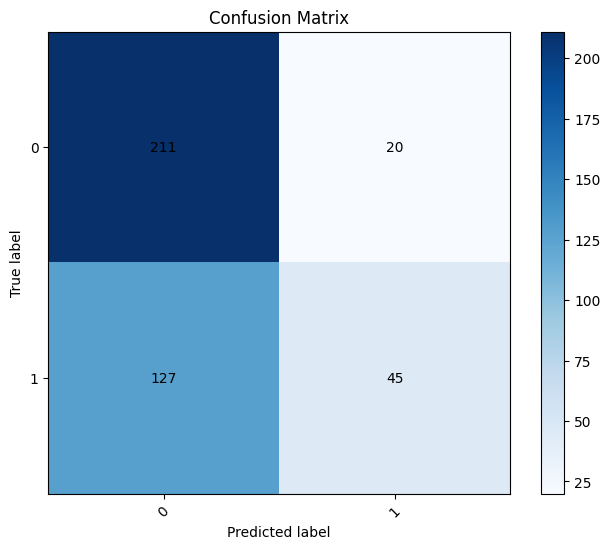



Confusion Matrix for Random Forest


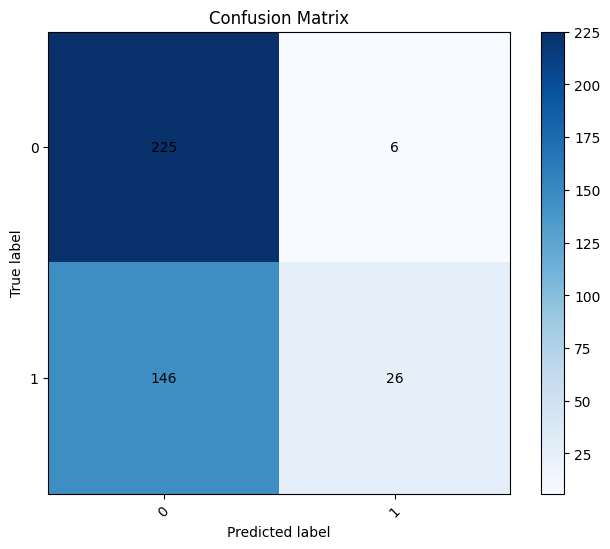

In [26]:
def plot_confusion_matrix(y_true, y_pred, classes):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(matrix[i, j]), ha='center', va='center')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Then, you can use this function to plot the confusion matrix
y_true_dt = y_test  # True labels for Decision Tree
y_pred_dt = dt_y_pred  # Predicted labels for Decision Tree
classes = [0, 1]  # Assuming your classes are 0 and 1

y_true_rf = y_test  # True labels for Random Forest
y_pred_rf = rf_y_pred  # Predicted labels for Random Forest

print("Confusion Matrix For Decision Tree\n")
plot_confusion_matrix(y_true_dt, y_pred_dt, classes)  # For Decision Tree
print("\n\nConfusion Matrix for Random Forest")
plot_confusion_matrix(y_true_rf, y_pred_rf, classes)  # For Random Forest



In [28]:
# @title Retrieve Feature Importance Scores
# Retrieve feature importance scores for Decision Tree
dt_feature_importances = dt_classifier.feature_importances_

# Retrieve feature importance scores for Random Forest
rf_feature_importances = rf_classifier.feature_importances_


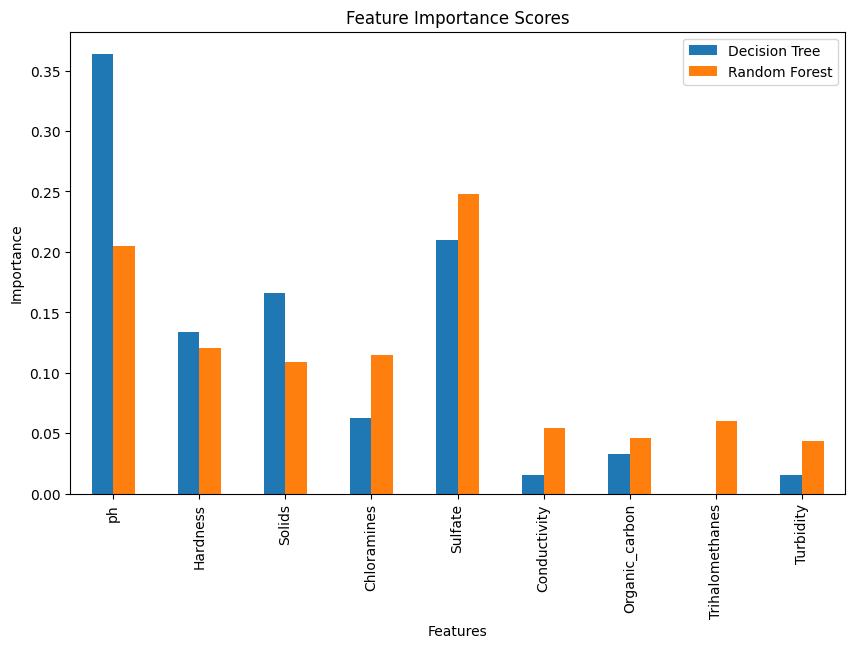

In [29]:
# @title Create a Bar Chart to Visualize Feature Importance
# Define the features
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Create a DataFrame to hold the feature importance scores
importance_df = pd.DataFrame({
    'Feature': features,
    'Decision Tree': dt_feature_importances,
    'Random Forest': rf_feature_importances
})

# Set 'Feature' column as index
importance_df.set_index('Feature', inplace=True)

# Plot the feature importance scores
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance Scores')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [33]:
# @title Classify water quality based on accuracy
threshold = 0.5

def classify_water_quality(probability):
    return "SAFE TO DRINK" if probability >= threshold else "NOT SAFE TO DRINK"

dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]

avg_probs = (dt_probs + rf_probs) / 2

water_quality = classify_water_quality(avg_probs.mean())
print(f"BASED ON ACCURACY AND BAR CHART FROM BOTH DECISION TREE AND RANDOM FOREST ,WATER IS  {water_quality}.")

BASED ON ACCURACY AND BAR CHART FROM BOTH DECISION TREE AND RANDOM FOREST ,WATER IS  NOT SAFE TO DRINK.
